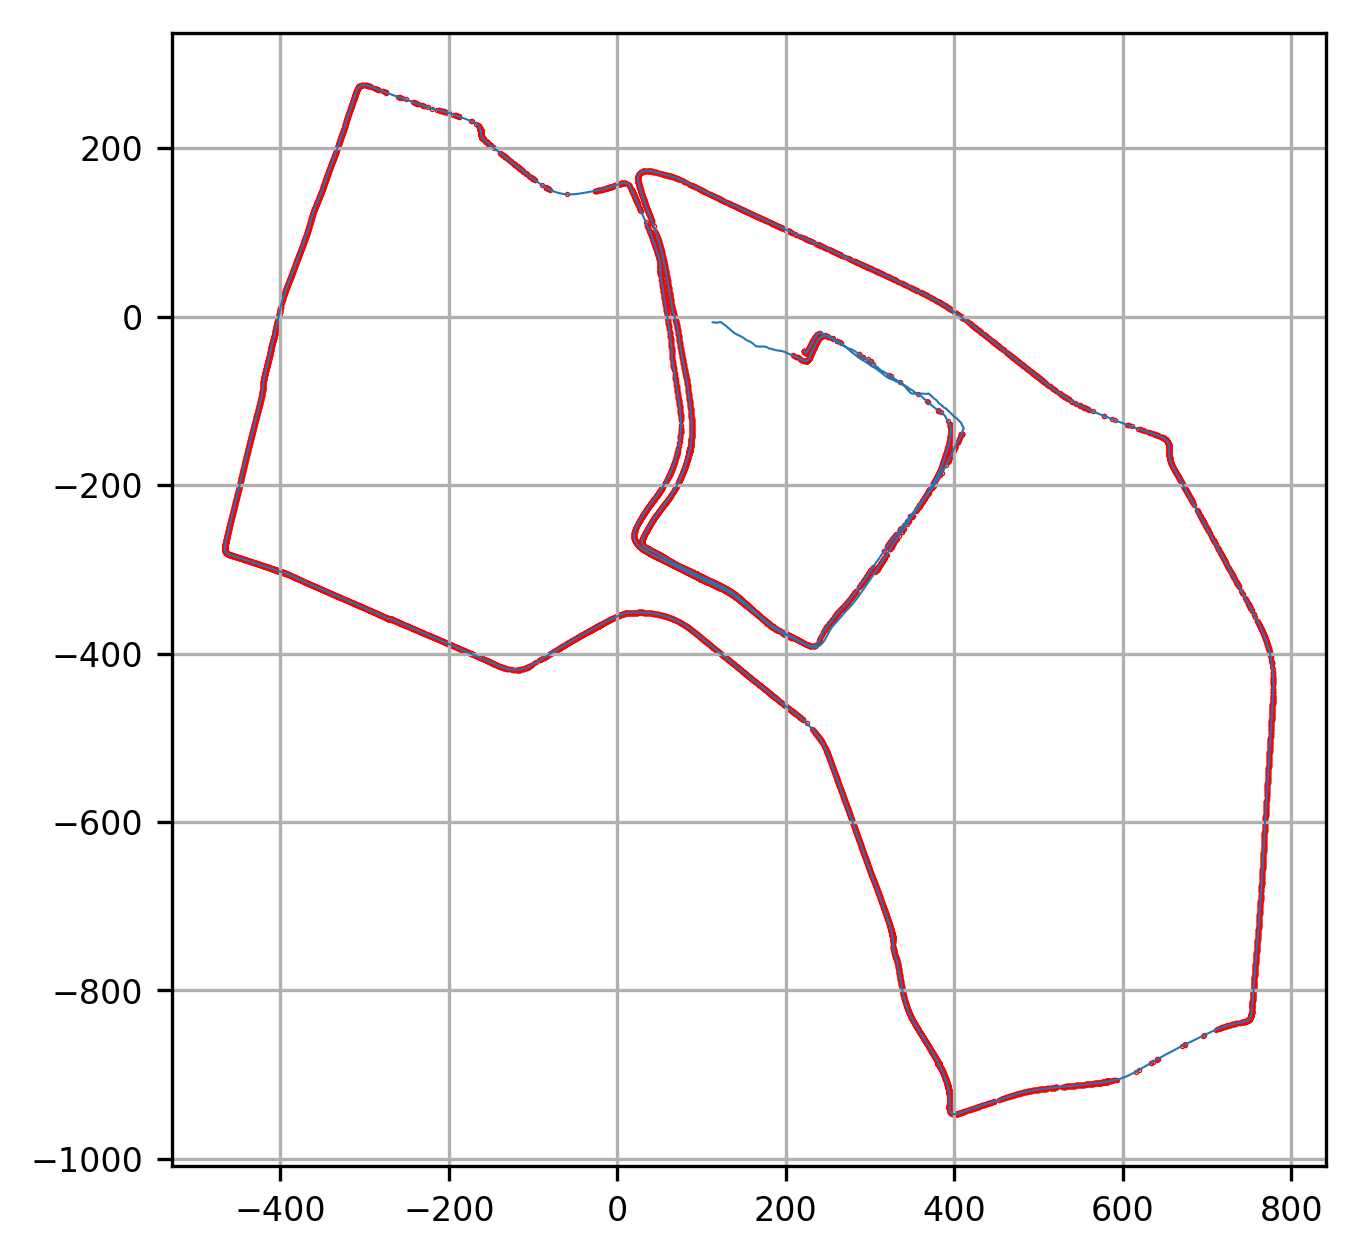

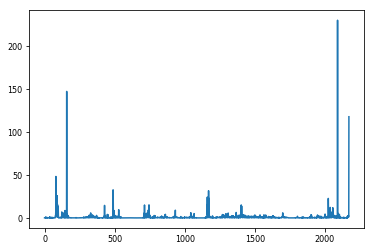

In [32]:
import pickle
import numpy as np
from matplotlib.pyplot import figure, plot, gca, scatter, grid, title, savefig, rc

queryImagePositions=np.loadtxt("/media/sujiwo/PlaceRecognition/ouster64-conv.image.csv")
fig1 = figure(dpi=300, figsize=(5,5))
plot(queryImagePositions[:,1], queryImagePositions[:,2], linewidth=0.5)
gca().set_aspect("equal")
grid()
rc("axes", labelsize=8)

fd = open("/media/sujiwo/PlaceRecognition/test-prep4-nosegnet.pickle", "rb")
queryResults = pickle.load(fd)
fd.close()

# Gather the recognized points
recognizedPts = np.array( [
    [ queryImagePositions[p,1], queryImagePositions[p,2], queryImagePositions[3] ]
    for p in queryResults if queryResults[p][0]!=0
] )

# Find distances between each recognized points
missDist = 0.0
statMiss = True
missDistances = []
for i in range(1, len(queryImagePositions)):
    curPos = queryImagePositions[i, 1:4]
    prevPos = queryImagePositions[i-1, 1:4]
    if queryResults[i][0]!=0:
        if statMiss==False:
            continue
        else:
            missDistances.append(missDist)
            missDist = 0.0
            statMiss = False
    else:
        if statMiss==True:
            missDist += np.linalg.norm(curPos-prevPos)
            continue
        else:
            missDist = np.linalg.norm(curPos-prevPos)
            statMiss = True
missDistances.append(missDist)

scatter(recognizedPts[:,0], recognizedPts[:,1], c="red", s=0.1)
# savefig("/tmp/place_recognition.png")

fig2 = figure()
plot(missDistances)